## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer='l2', reg_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    reg = None
    if regularizer == 'l2':
        reg = keras.regularizers.l2(reg_ratio)
    elif regularizer == 'l1':
        reg = keras.regularizers.l1(reg_ratio)

    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=reg)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=reg)(x)
    out = keras.layers.Dense(units=output_units, 
                             activation="softmax", 
                             name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
            
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
reg_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {'l2': {}, 
           'l1': {}}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in reg_EXP:
    model = build_mlp(x_train.shape[-1], regularizer='l2', reg_ratio=ratio)
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train,
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(ratio)
    results["l2"][exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 15.0904 - accuracy: 0.2771WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F19B303AF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

196/196 [==============================] - 6s 30ms/step - loss: 1.6338 - accuracy: 0.5193 - val_loss: 1.7294 - val_accuracy: 0.4861
Epoch 45/50
196/196 [==============================] - 6s 32ms/step - loss: 1.6303 - accuracy: 0.5169 - val_loss: 1.7215 - val_accuracy: 0.4822 - accuracy: 0. - ETA: 0s - loss: 1.6309 
Epoch 46/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6258 - accuracy: 0.5214 - val_loss: 1.6857 - val_accuracy: 0.4986
Epoch 47/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6207 - accuracy: 0.5223 - val_loss: 1.7173 - val_accuracy: 0.4826
Epoch 48/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6196 - accuracy: 0.5218 - val_loss: 1.6845 - val_accuracy: 0.4986
Epoch 49/50
196/196 [==============================] - 7s 33ms/step - loss: 1.6140 - accuracy: 0.5247 - val_loss: 1.6855 - val_accuracy: 0.4975
Epoch 50/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6124 - accuracy: 0.5239 - val

196/196 [==============================] - 6s 32ms/step - loss: 1.1816 - accuracy: 0.6327 - val_loss: 1.5445 - val_accuracy: 0.5176
Epoch 37/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1700 - accuracy: 0.6388 - val_loss: 1.4721 - val_accuracy: 0.5309
Epoch 38/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1571 - accuracy: 0.6428 - val_loss: 1.5057 - val_accuracy: 0.5294
Epoch 39/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1458 - accuracy: 0.6459 - val_loss: 1.5049 - val_accuracy: 0.5252
Epoch 40/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1343 - accuracy: 0.6517 - val_loss: 1.4867 - val_accuracy: 0.5318
Epoch 41/50
196/196 [==============================] - 6s 28ms/step - loss: 1.1220 - accuracy: 0.6556 - val_loss: 1.5671 - val_accuracy: 0.5166
Epoch 42/50
196/196 [==============================] - 6s 28ms/step - loss: 1.1101 - accuracy: 0.6597 - val_loss: 1.6331 - val_accuracy: 0.4939
Epoc

Epoch 30/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1269 - accuracy: 0.6055 - val_loss: 1.3371 - val_accuracy: 0.5310
Epoch 31/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1162 - accuracy: 0.6074 - val_loss: 1.3503 - val_accuracy: 0.5197
Epoch 32/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1001 - accuracy: 0.6132 - val_loss: 1.3348 - val_accuracy: 0.5322
Epoch 33/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0903 - accuracy: 0.6176 - val_loss: 1.3368 - val_accuracy: 0.5254
Epoch 34/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0746 - accuracy: 0.6218 - val_loss: 1.4293 - val_accuracy: 0.5184
Epoch 35/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0617 - accuracy: 0.6279 - val_loss: 1.3661 - val_accuracy: 0.5295
Epoch 36/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0546 - accuracy: 0.6311 - val_loss: 1.3581 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 1.2260 - accuracy: 0.5653 - val_loss: 1.3596 - val_accuracy: 0.5166
Epoch 24/50
196/196 [==============================] - 6s 29ms/step - loss: 1.2124 - accuracy: 0.5730 - val_loss: 1.3839 - val_accuracy: 0.5134
Epoch 25/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1976 - accuracy: 0.5776 - val_loss: 1.3952 - val_accuracy: 0.5101
Epoch 26/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1848 - accuracy: 0.5822 - val_loss: 1.3383 - val_accuracy: 0.5217
Epoch 27/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1700 - accuracy: 0.5865 - val_loss: 1.3636 - val_accuracy: 0.5204
Epoch 28/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1594 - accuracy: 0.5890 - val_loss: 1.3433 - val_accuracy: 0.5225
Epoch 29/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1439 - accuracy: 0.5973 - val_loss: 1.3491 - val_accuracy: 0.5221
Epoc

In [8]:
for ratio in reg_EXP:
    model = build_mlp(x_train.shape[-1], regularizer='l1', reg_ratio=ratio)
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train,
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(ratio)
    results["l1"][exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 199.0834 - accuracy: 0.2233 ETA: 2s -WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F19F3DE558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_V

196/196 [==============================] - 7s 33ms/step - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 7s 33ms/step - loss: 2.4626 - accuracy: 0.0973 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 6s 32ms/step - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 6s 31ms/step - loss: 2.4626 - accuracy: 0.0986 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 6s 31ms/step - loss: 2.4626 - accuracy: 0.0980 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 7s 33ms/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 7s 34ms/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 6s 31ms/step - loss: 3.1757 - accuracy: 0.6041 - val_loss: 3.3687 - val_accuracy: 0.5278
Epoch 38/50
196/196 [==============================] - 6s 32ms/step - loss: 3.1272 - accuracy: 0.6069 - val_loss: 3.4036 - val_accuracy: 0.5032
Epoch 39/50
196/196 [==============================] - 6s 30ms/step - loss: 3.0823 - accuracy: 0.6077 - val_loss: 3.3108 - val_accuracy: 0.5165
Epoch 40/50
196/196 [==============================] - 6s 30ms/step - loss: 3.0340 - accuracy: 0.6144 - val_loss: 3.2513 - val_accuracy: 0.5232
Epoch 41/50
196/196 [==============================] - 6s 30ms/step - loss: 2.9910 - accuracy: 0.6159 - val_loss: 3.2455 - val_accuracy: 0.5256
Epoch 42/50
196/196 [==============================] - 6s 31ms/step - loss: 2.9491 - accuracy: 0.6160 - val_loss: 3.2058 - val_accuracy: 0.5221
Epoch 43/50
196/196 [==============================] - 6s 30ms/step - loss: 2.9082 - accuracy: 0.6183 - val_loss: 3.2424 - val_accuracy: 0.5059
Epoc

196/196 [==============================] - 6s 32ms/step - loss: 1.1300 - accuracy: 0.6030 - val_loss: 1.3870 - val_accuracy: 0.5065
Epoch 31/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1182 - accuracy: 0.6072 - val_loss: 1.3511 - val_accuracy: 0.5201
Epoch 32/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1036 - accuracy: 0.6123 - val_loss: 1.3904 - val_accuracy: 0.5056
Epoch 33/50
196/196 [==============================] - 6s 32ms/step - loss: 1.0930 - accuracy: 0.6149 - val_loss: 1.3446 - val_accuracy: 0.5264
Epoch 34/50
196/196 [==============================] - 6s 31ms/step - loss: 1.0770 - accuracy: 0.6205 - val_loss: 1.3513 - val_accuracy: 0.5210
Epoch 35/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0614 - accuracy: 0.6277 - val_loss: 1.3526 - val_accuracy: 0.5214
Epoch 36/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0536 - accuracy: 0.6302 - val_loss: 1.5923 - val_accuracy: 0.4773
Epoc

Epoch 24/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1924 - accuracy: 0.5779 - val_loss: 1.4558 - val_accuracy: 0.4919
Epoch 25/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1781 - accuracy: 0.5839 - val_loss: 1.3819 - val_accuracy: 0.5128
Epoch 26/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1637 - accuracy: 0.5911 - val_loss: 1.3863 - val_accuracy: 0.5086
Epoch 27/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1481 - accuracy: 0.5953 - val_loss: 1.3635 - val_accuracy: 0.5124
Epoch 28/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1352 - accuracy: 0.6002 - val_loss: 1.4159 - val_accuracy: 0.4962
Epoch 29/50
196/196 [==============================] - 6s 33ms/step - loss: 1.1240 - accuracy: 0.6024 - val_loss: 1.3559 - val_accuracy: 0.5254
Epoch 30/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1065 - accuracy: 0.6099 - val_loss: 1.3445 - val_accuracy:

C:\Users\JoeZhong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


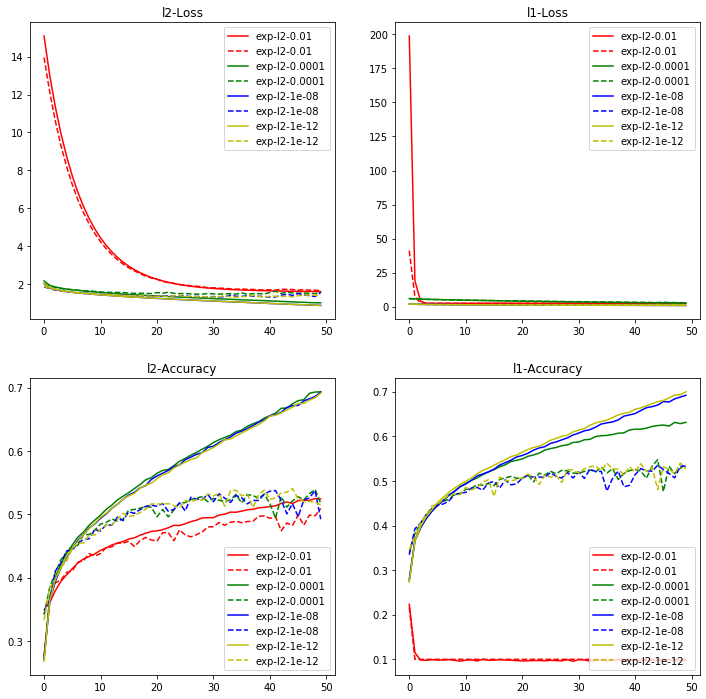

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i, reg in enumerate(results.keys()):
    for j, cond in enumerate(results['l2'].keys()):
        ax[0][i].plot(range(len(results[reg][cond]['train-loss'])), results[reg][cond]['train-loss'], '-', label=cond, color=color_bar[j])
        ax[0][i].plot(range(len(results[reg][cond]['valid-loss'])), results[reg][cond]['valid-loss'], '--', label=cond, color=color_bar[j])
        ax[0][i].set_title('%s-Loss' %(reg))
        ax[0][i].legend()
        
        ax[1][i].plot(range(len(results[reg][cond]['train-acc'])), results[reg][cond]['train-acc'], '-', label=cond, color=color_bar[j])
        ax[1][i].plot(range(len(results[reg][cond]['valid-acc'])), results[reg][cond]['valid-acc'], '--', label=cond, color=color_bar[j])
        ax[1][i].set_title('%s-Accuracy'%(reg))
        ax[1][i].legend()
fig.show()